In [10]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import quandl
import requests
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import quandl
quandl.ApiConfig.api_key = 'quR4iZ_ofdHvYWGnqg1L'

In [3]:
start = '2007-1-1'
end = '2015-1-1'

PG = quandl.get("WIKI/PG", start_date=start, end_date = end)
PG.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-12-24,93.50,93.890,93.14,93.14,2408140.0,0.0,1.0,84.974019,85.328456,84.646846,84.646846,2408140.0
2014-12-26,93.15,93.806,93.06,93.46,3148746.0,0.0,1.0,84.655934,85.252116,84.574141,84.937666,3148746.0
2014-12-29,93.12,93.430,92.50,92.64,4657706.0,0.0,1.0,84.628670,84.910402,84.065206,84.192440,4657706.0
2014-12-30,92.25,92.820,92.10,92.40,4730012.0,0.0,1.0,83.838003,84.356026,83.701681,83.974325,4730012.0
2014-12-31,92.04,92.550,91.03,91.09,5712139.0,0.0,1.0,83.647152,84.110647,82.729251,82.783780,5712139.0


In [4]:
PG['pct_change'] = PG['Close'].pct_change()
PG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,pct_change
Date,,,,,,,,,,,,,
2007-01-03,64.22,64.66,63.70,64.54,9717900.0,0.0,1.0,46.232934,46.549697,45.858579,46.463307,9717900.0,NaN
2007-01-04,64.34,64.50,63.75,64.05,8711400.0,0.0,1.0,46.319324,46.434511,45.894574,46.110549,8711400.0,-0.007592
2007-01-05,63.87,64.00,63.34,63.50,9907900.0,0.0,1.0,45.980964,46.074553,45.599409,45.714596,9907900.0,-0.008587
2007-01-08,63.59,63.78,63.23,63.64,11068200.0,0.0,1.0,45.779388,45.916172,45.520219,45.815384,11068200.0,0.002205
2007-01-09,63.39,63.80,63.11,63.48,10823800.0,0.0,1.0,45.635405,45.930570,45.433829,45.700197,10823800.0,-0.002514


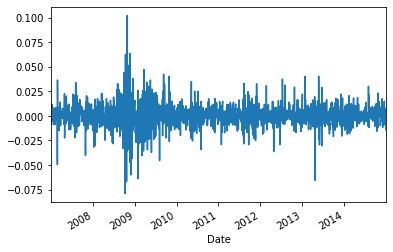

In [5]:
PG['pct_change'].plot()

In [6]:
avg_return = PG['pct_change'].mean()*250
avg_return

0.059773532510099335

In [7]:
print (round(avg_return,2))

0.06


**Regression**

In [11]:
data = pd.read_excel('3.2 Housing.xlsx.xlsx')
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [12]:
y = data['House Price']

In [13]:
x = data['House Size (sq.ft.)']

Text(0.5, 1.0, 'betichod')

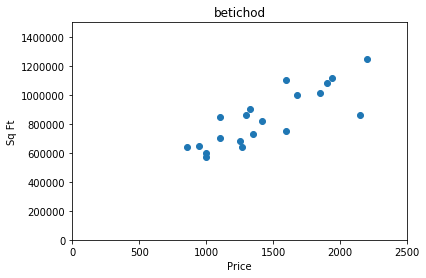

In [14]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])
plt.xlabel('Price')
plt.ylabel('Sq Ft')
plt.title('betichod')

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [16]:
print (slope)
print (intercept)
print (r_value)
print (r_value**2)
print (p_value)
print (std_err)

401.91628631922595
260806.2360560964
0.8235775534696924
0.678279986579124
8.129642377231308e-06
65.24299510636492


__Basic finance concepts__

In [17]:
assets = ['WIKI/PG','WIKI/GS']
start = '2010-1-1'
end = '2017-3-20'
pt_data = pd.DataFrame()
for a in assets:
    pt_data[a] = quandl.get(a, start_date=start, end_date=end)['Close']
pt_data.head()

,WIKI/PG,WIKI/GS
Date,,
2010-01-04,61.12,173.08
2010-01-05,61.14,176.14
2010-01-06,60.85,174.26
2010-01-07,60.52,177.67
2010-01-08,60.44,174.31


In [18]:
data = pd.DataFrame()
data = pd.read_csv('4.2 Markowitz_Data.csv')
data = data.set_index('Date')
returns = data.pct_change()
cov = returns.cov()*250
cov_with_market = cov.iloc[0,1]
market_var = returns['^GSPC'].var()*250
rf = 0.025
rp = 0.05
std_pg = returns['PG'].std()*(250**0.5)

**BETA**

In [19]:
beta = cov_with_market/market_var
beta

0.5347902168641087

**CAPM**

In [20]:
ER = rf + beta*rp
ER

0.05173951084320544

**Sharpe ratio**

In [21]:
Sharpe = (ER - rf)/std_pg
Sharpe

0.18694484014820276

In [22]:
num_assets = 2

In [23]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.83524957, 0.16475043])

**Expected portfolio return**

In [24]:
np.sum(weights * returns.mean())*250

0.07212050733021826

**Expected Portfolio variance**


In [25]:
np.dot(weights.T, np.dot(returns.cov()*250,weights))

0.018339532917012707

**Expected portfolio Volatility**

In [26]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250,weights)))

0.13542353162213983

### Efficient potfolio curve

In [27]:
pft_return = []
pft_volat = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pft_return.append(np.sum(weights * returns.mean())*250)
    pft_volat.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250,weights))))
pft_return = np.array(pft_return)
pft_volat = np.array(pft_volat)
pft_return, pft_volat

(array([0.08170284, 0.10025063, 0.07918336, 0.08108939, 0.089393  ,
        0.09586887, 0.08879122, 0.07422153, 0.09660452, 0.09437295,
        0.1042774 , 0.06592362, 0.10780239, 0.07467927, 0.08451191,
        0.08176064, 0.0729607 , 0.09338508, 0.0876341 , 0.08111664,
        0.08854325, 0.08695214, 0.07552097, 0.10668702, 0.09773756,
        0.09037592, 0.08984231, 0.08119003, 0.09304954, 0.09378988,
        0.0875762 , 0.08729683, 0.09113517, 0.08792401, 0.08799413,
        0.08783991, 0.0768596 , 0.07322535, 0.09105029, 0.08630184,
        0.08902177, 0.08351008, 0.06939226, 0.09841155, 0.10413782,
        0.07771886, 0.07049375, 0.10493905, 0.0884824 , 0.09892613,
        0.09288366, 0.07894711, 0.09975841, 0.08525875, 0.08446562,
        0.07040163, 0.08532644, 0.0839465 , 0.09594076, 0.08336589,
        0.08690498, 0.08524539, 0.0759822 , 0.07255646, 0.09439894,
        0.07170123, 0.08925956, 0.09049885, 0.09009915, 0.08457197,
        0.09455634, 0.08079946, 0.08891413, 0.08

In [28]:
portfolios = pd.DataFrame({'Return':pft_return, 'Volatility':pft_volat})
portfolios

,Return,Volatility
0,0.081703,0.130904
1,0.100251,0.138521
2,0.079183,0.131540
3,0.081089,0.131021
4,0.089393,0.131474
...,...,...
995,0.095182,0.134363
996,0.100789,0.139047
997,0.070830,0.136453
998,0.089399,0.131476


Text(0.5, 1.0, 'Lavde ka sarkaar')

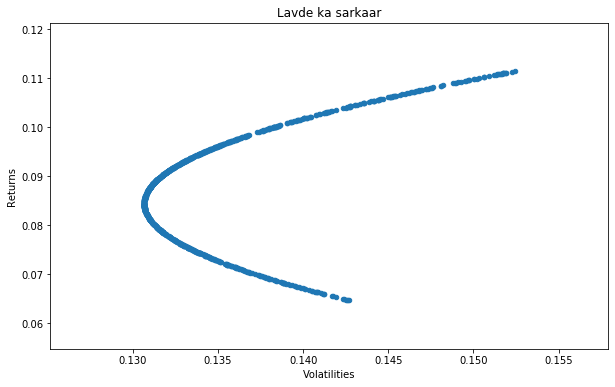

In [29]:
portfolios.plot(x='Volatility', y='Return', kind = 'scatter', figsize=(10,6))
plt.xlabel('Volatilities')
plt.ylabel('Returns')
plt.title('Lavde ka sarkaar')

### Monte carlo simulation

**Gross profit estimation**

In [30]:
rev_m = 170
rev_std = 20
iterations = 1000

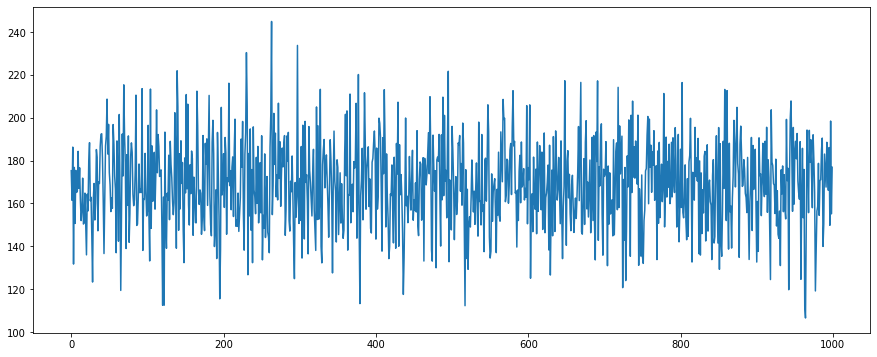

In [31]:
rev = np.random.normal(rev_m,rev_std,iterations)
plt.figure(figsize=(15,6))
plt.plot(rev)

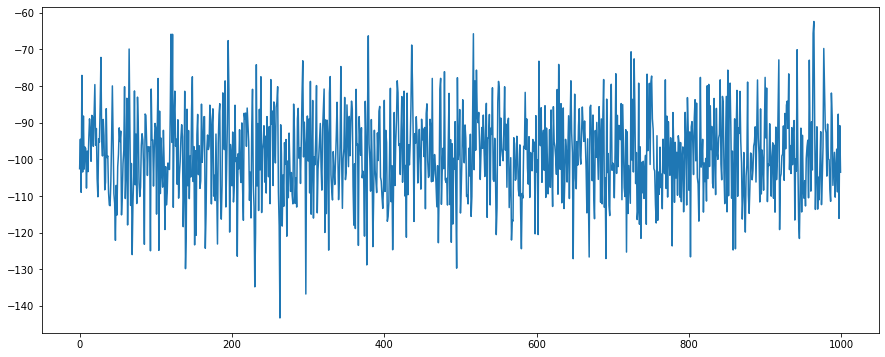

In [32]:
cogs = -(rev*np.random.normal(0.6,0.1))
plt.figure(figsize=(15,6))
plt.plot(cogs)

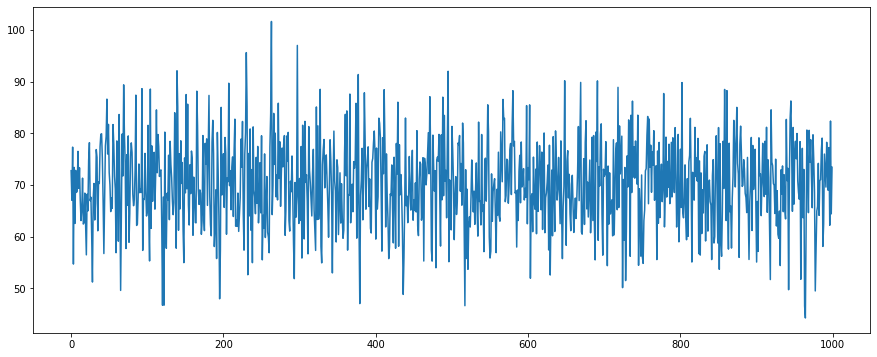

In [33]:
gross_pr = rev + cogs
plt.figure(figsize=(15,6))
plt.plot(gross_pr)

In [34]:
min(gross_pr)

44.228856510749225

In [35]:
max(gross_pr)

101.62932573134199

In [36]:
gross_pr.mean()

70.1010435162142

In [37]:
gross_pr.std()

8.530668498816844

(array([ 1.,  5.,  1.,  4.,  2.,  7.,  4., 19., 24., 24., 23., 41., 43.,
        48., 61., 65., 72., 61., 59., 62., 56., 56., 48., 57., 47., 30.,
        23., 10., 13.,  7., 14.,  6.,  2.,  2.,  0.,  1.,  1.,  0.,  0.,
         1.]), array([ 44.22885651,  45.66386824,  47.09887997,  48.5338917 ,
         49.96890343,  51.40391516,  52.83892689,  54.27393862,
         55.70895035,  57.14396209,  58.57897382,  60.01398555,
         61.44899728,  62.88400901,  64.31902074,  65.75403247,
         67.1890442 ,  68.62405593,  70.05906766,  71.49407939,
         72.92909112,  74.36410285,  75.79911458,  77.23412631,
         78.66913804,  80.10414977,  81.5391615 ,  82.97417323,
         84.40918497,  85.8441967 ,  87.27920843,  88.71422016,
         90.14923189,  91.58424362,  93.01925535,  94.45426708,
         95.88927881,  97.32429054,  98.75930227, 100.194314  ,
        101.62932573]), <a list of 40 Patch objects>)

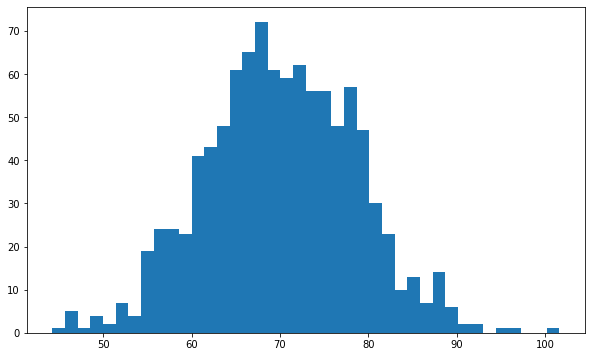

In [38]:
plt.figure(figsize=(10,6))
plt.hist(gross_pr, bins = 40)

**Stock price estimation**

In [39]:
data = pd.DataFrame()
data = pd.read_excel('ibullfinance.xls')
data = data.set_index('MONTHYEAR')

data = pd.DataFrame(data['CLOSE_PRICE'])
data

,CLOSE_PRICE
MONTHYEAR,
2021-03-02,228.95
2021-03-01,222.40
2021-02-26,218.70
2021-02-25,225.50
2021-02-24,217.55
...,...
2013-07-29,230.90
2013-07-26,243.05
2013-07-25,255.80


In [40]:
log_returns = pd.DataFrame(np.log(1+data.pct_change()))
log_returns

,CLOSE_PRICE
MONTHYEAR,
2021-03-02,NaN
2021-03-01,-0.029026
2021-02-26,-0.016777
2021-02-25,0.030619
2021-02-24,-0.035891
...,...
2013-07-29,0.051088
2013-07-26,0.051282
2013-07-25,0.051129


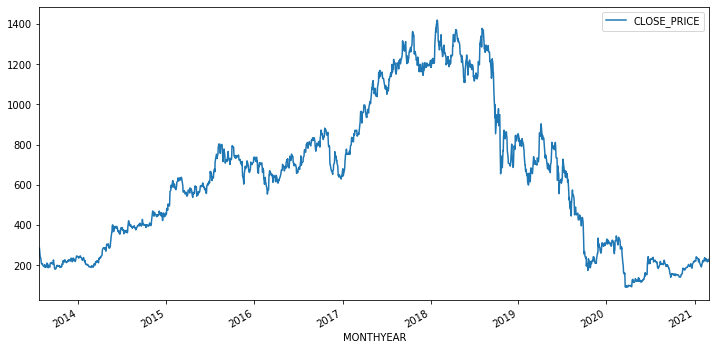

In [41]:
data.plot(figsize=(12,6))

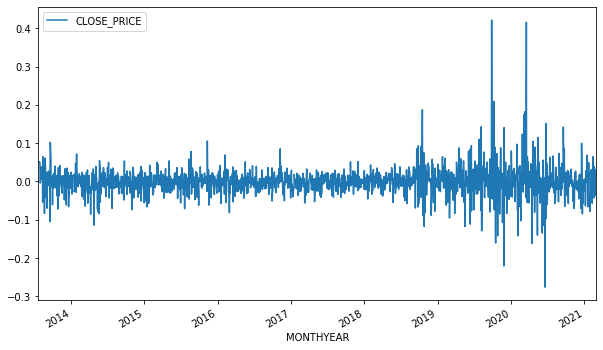

In [42]:
log_returns.plot(figsize=(10,6))

In [43]:
mean = log_returns.mean()
var = log_returns.var()
drift = mean - (0.5*var)
std = log_returns.std()
drift.values
std.values
t_intervals = 1000
iterations = 10

Brownian formula 

Daily returns = e^r

r = drift + std*z

In [44]:
daily_returns = np.exp(drift.values + std.values * st.norm.ppf(np.random.rand(t_intervals,iterations)))

In [45]:
daily_returns

array([[1.02767208, 0.9915709 , 0.96865231, ..., 1.04528904, 0.99024762,
        0.99814612],
       [1.01612469, 0.99354663, 1.01501248, ..., 0.96623552, 0.97826047,
        0.97157851],
       [1.05915577, 1.02757078, 0.92292144, ..., 0.96097489, 0.99581425,
        1.01375182],
       ...,
       [0.96416871, 1.00206478, 0.98402544, ..., 1.00922357, 0.98701806,
        0.97305227],
       [1.08836909, 0.9781953 , 1.0582782 , ..., 1.03399526, 0.95637444,
        0.96032565],
       [1.03789733, 0.96945918, 0.94346811, ..., 1.04136503, 0.94782563,
        1.02757938]])

In [49]:
s0 = data.iloc[0]

In [51]:
price_list = np.zeros_like(daily_returns)
price_list[0] = s0
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] *daily_returns[t]

In [52]:
price_list

array([[228.95      , 228.95      , 228.95      , ..., 228.95      ,
        228.95      , 228.95      ],
       [232.6417478 , 227.47250169, 232.38710634, ..., 221.21962286,
        223.97273514, 222.44290087],
       [246.40384944, 233.74409665, 214.47504262, ..., 212.58650274,
        223.0352402 , 225.50189633],
       ...,
       [115.99967328,  39.41260123,  28.98012636, ..., 365.55909576,
        117.39797009, 201.14637797],
       [126.25045905,  38.5532211 ,  30.66903604, ..., 377.98637393,
        112.27641803, 193.16602602],
       [131.03501462,  37.37577395,  28.9352576 , ..., 393.6217919 ,
        106.41846681, 198.49342619]])

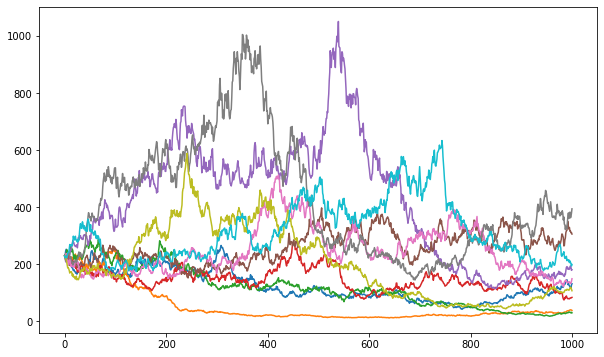

In [53]:
plt.figure(figsize = (10,6))
plt.plot(price_list)

---

__Black scholes model__

In [54]:
def d1(S, K, r, std, T):
    return (np.log(S/K) + (r + std**2/2)*T)/(std*np.sqrt(T))
def d2(S, K, r, std, T):
    return (np.log(S/K) + (r - std**2/2)*T)/(std*np.sqrt(T))

Co = S*n(d1) - Xe^-rt*n(d2)

In [55]:
def BSM(S, K, r, std, T):
    return (S* st.norm.cdf(d1(S, K, r, std, T))) - (K * np.exp(-r*T) * st.norm.cdf(d2(S, K, r, std, T)))

In [57]:
data = pd.DataFrame()
data = pd.read_excel('ibullfinance.xls')
data = data.set_index('MONTHYEAR')

data = pd.DataFrame(data['CLOSE_PRICE'])

In [73]:
S = data.iloc[0]
log_returns = np.log(1 + data.pct_change())
std = log_returns.std()*250**0.5
r = 0.025
K = 240
T = 1

In [74]:
d1(S, K, r, std, T)

CLOSE_PRICE    0.252883
dtype: float64

In [75]:
d2(S, K, r, std, T)

CLOSE_PRICE   -0.328969
dtype: float64

In [76]:
BSM(S, K, r, std, T)

CLOSE_PRICE    50.46635
Name: 2021-03-02 00:00:00, dtype: float64

---

__Euler discretization for Call option__

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$

In [96]:
data = pd.DataFrame()
data = pd.read_excel('ibullfinance.xls')
data = data.set_index('MONTHYEAR')
data = pd.DataFrame(data['CLOSE_PRICE'])
log_returns = np.log(1 + data.pct_change())
std = log_returns.std()*250**0.5
r = 0.025
std = std.values
T = 0.25
t_intervals = 250
delta_t = T/t_intervals
iterations = 10000
Z = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
s0 = data.iloc[0]
S[0] = s0
for t in range(1,t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * std ** 2) * delta_t + std * delta_t ** 0.5 * Z[t])

In [97]:
S.shape

(251, 10000)

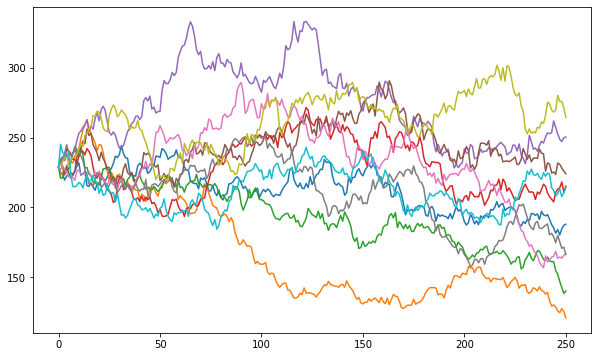

In [98]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])

In [99]:
p = np.maximum(S[-1]-240,0)

In [100]:
c = np.exp(-r*T)*np.sum(p)/iterations

In [101]:
c

22.962250099125235